In [68]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import ensemble

In [69]:
import matplotlib.pyplot as plt

In [70]:
import seaborn as sns

In [71]:
data = pd.read_csv("Dell_data_500.csv")
data.tail(5)

,asin,C1,C2,C3,P1,P2,P3,Review Sentiment,Service Rating,Customer Sentiment
543,B006NTK3MM,5,5,0,3,5,2,2.40,1,NaN
544,B006NWJBZE,5,4,1,4,2,4,2.43,0,NaN
545,B006NXX5YG,6,3,1,5,1,4,1.80,3,NaN
546,B006OFWBE8,6,0,4,7,0,3,2.27,4,NaN
547,B006OSNP5O,8,2,0,6,4,0,0.90,4,NaN


In [72]:
# data = pd.read_csv("Dell_data_500(Integer).csv")
# data.tail(5)

In [73]:
train = data[data.columns[1:9]][0:498]
target = data['Customer Sentiment'][0:498]

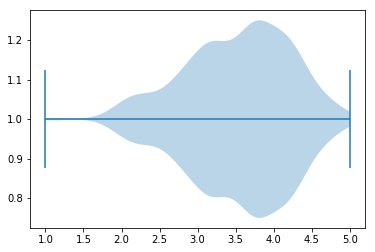

In [74]:
fig, ax = plt.subplots()

ax.violinplot(target, vert=False)

# Show the plot
plt.show()

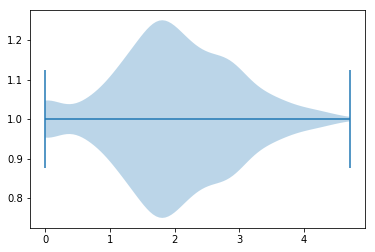

In [75]:
fig, ax = plt.subplots()
ax.violinplot(data['Review Sentiment'], vert=False)

# Show the plot
plt.show()

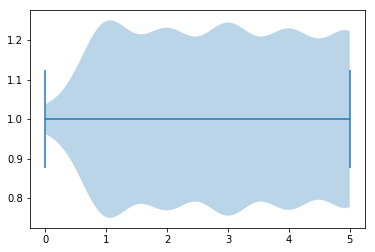

In [76]:
fig, ax = plt.subplots()
ax.violinplot(data['Service Rating'], vert=False)

# Show the plot
plt.show()

In [77]:
train.tail(5)

,C1,C2,C3,P1,P2,P3,Review Sentiment,Service Rating
493,3,5,2,7,2,1,2.49,3
494,3,5,2,7,2,1,1.75,2
495,8,2,0,6,1,3,1.27,2
496,7,3,0,5,3,2,2.21,4
497,4,2,4,5,3,2,3.53,4


In [78]:
target.tail(5)

493    3.1
494    2.1
495    3.2
496    4.1
497    4.4
Name: Customer Sentiment, dtype: float64

In [79]:
train.shape

(498, 8)

In [80]:
target.shape

(498,)

In [81]:
x_train , x_test , y_train , y_test = train_test_split(train , target , test_size = 0.25,random_state =2)

In [82]:
x_train.shape

(373, 8)

In [83]:
x_test.shape

(125, 8)

In [84]:
y_test.shape

(125,)

In [85]:
from sklearn import linear_model

In [86]:
clf2 = linear_model.Lasso(alpha=0.1)

In [109]:
clf2.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
clf2.score(x_test,y_test)

0.5869914777869584

In [111]:
clf3 = linear_model.LinearRegression()

In [112]:
clf3.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
clf3.score(x_test,y_test)

0.5729205140265122

In [114]:
clf4 = linear_model.Ridge(alpha=0.05,normalize = True)

In [115]:
clf4.fit(x_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [116]:
clf4.score(x_test,y_test)

0.6161276262209959

In [117]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 3, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')


In [118]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [119]:
clf.score(x_test,y_test)

0.5227836564555732

In [120]:
from sklearn.svm import SVR

In [121]:
clf5 = SVR(C=1.0, epsilon=0.2,degree=2)
clf5.fit(x_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [122]:
clf5.score(x_test,y_test)

0.5552500930190709

In [123]:
from sklearn.kernel_ridge import KernelRidge

In [124]:
clf6 = KernelRidge(alpha=1.0,degree=2)
clf6.fit(x_train, y_train) 

KernelRidge(alpha=1.0, coef0=1, degree=2, gamma=None, kernel='linear',
      kernel_params=None)

In [125]:
clf6.score(x_test,y_test)

0.6153784754973393

In [126]:
from sklearn.externals import joblib
joblib.dump(clf4,'trained.pkl') 

['trained.pkl']

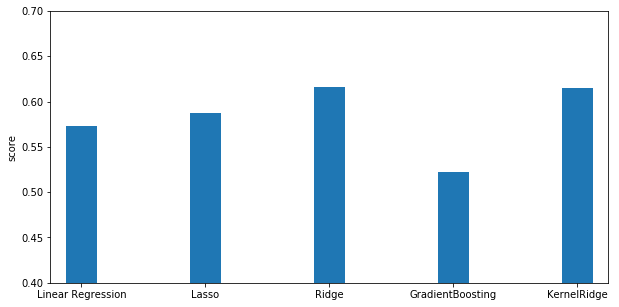

In [148]:
left = [5, 25, 45, 65, 85]
 
# heights of bars
height = [float(clf3.score(x_test,y_test)), float(clf2.score(x_test,y_test)),float(clf4.score(x_test,y_test)),float(clf.score(x_test,y_test)),float(clf6.score(x_test,y_test))]
 
# labels for bars
tick_label = ['Linear Regression', 'Lasso', 'Ridge','GradientBoosting','KernelRidge']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 5.0)
 
# naming the x-axis

# naming the y-axis
plt.ylabel('score')
# plot title
plt.rcParams['figure.figsize'] = [10, 5]
plt.axis([0, 90, 0.4,0.7]) 
 
# function to show the plot
plt.show()